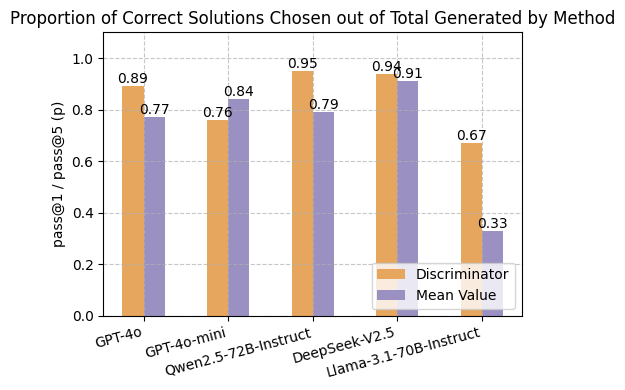

In [15]:
import matplotlib.pyplot as plt
import numpy as np

colors = {
    "GPT-4o": '#D64F49',  # Akane (Deep Red)
    "DeepSeek-V2.5": '#9B4C7D',  # Shion (Purple)
}

markers = {
    "GPT-4o": 'o',
    "GPT-4o-mini": 's',
    "Qwen2.5-72B-Instruct": '^',
    "DeepSeek-V2.5": 'D',
    "Llama-3.1-70B-Instruct": 'v'
}

results = {
    "GPT-4o": {
        "total": 103,
        "discriminator": 92,
        "value": 79,
    },
    "GPT-4o-mini": {
        "total": 67,
        "value": 56,
        "discriminator": 51,
    },
    "Qwen2.5-72B-Instruct": {
        "total": 77,
        "discriminator": 73,
        "value": 61,
    },
    "DeepSeek-V2.5": {
        "total": 67,
        "discriminator": 63,
        "value": 61,
    },
    "Llama-3.1-70B-Instruct": {
        "total": 70,
        "discriminator": 47,
        "value": 23
    },
}

results_proportion = {
    model: {
        "total": 1.0,
        "discriminator": round(data["discriminator"] / data["total"], 2),
        "value": round(data["value"] / data["total"], 2)
    }
    for model, data in results.items()
}


# Prepare data for plotting
models = list(results_proportion.keys())
total = [results_proportion[model]['total'] for model in models]
discriminator = [results_proportion[model]['discriminator'] for model in models]
value = [results_proportion[model]['value'] for model in models]

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 4))

ax.grid(True, linestyle='--', alpha=0.7)

# Plot bars with new colors
bar_width = 0.25
index = np.arange(len(models))

# ax.bar(index - bar_width, total, bar_width, label='Total', color='#4B8F8C')  # Fukagawa-nezu (Teal)
ax.bar(index, discriminator, bar_width, label='Discriminator', color='#E6A65D')  # Kohaku (Amber)
ax.bar(index + bar_width, value, bar_width, label='Mean Value', color='#9B90C2')  # Fukamidori (Deep Green)

# Customize the plot
# ax.set_xlabel('Models')
ax.set_ylabel("pass@1 / pass@5 (p)")
ax.set_ylim(0, 1.1)
ax.set_title('Proportion of Correct Solutions Chosen out of Total Generated by Method')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=15, ha='right')
ax.legend(loc='lower right')

# Add value labels on top of each bar
for i, v in enumerate(discriminator + value):
    ax.text(i % len(models) + (i // len(models)) * bar_width, v, f'{v:.2f}', 
            ha='center', va='bottom')

# for i, model in enumerate(models):
#     if model in colors:
#         ax.axvspan(i - 0.5*bar_width, i + 1.5*bar_width, facecolor=colors[model], alpha=0.1)

plt.tight_layout()
plt.show()